

#### Лабораторная работа №7 по теме: "задача Коши"
******

                                                                                                                                                                  **Работу выполнил студент 430 группы Пугавко М.М.**
                                                                                                                                                                  
***
##### Рассмотрим три способа

 ####        1. Чисто неявный метод
 ***
 
 Рассмотрим задачу Коши (во всех трех способах задача будет одной)
 Пусть дан вектор y' = f(x,y)
 
 y', f' - вектора
 
 так же дано условие: y(a) = $y_0$
 
 Рассмотрим сам метод:
 
 Он довольно простой. 
 
 $$ \frac{y_{n+1} - y_n}{h}  - f(x_n, y_n) = 0$$
 
 h - шаг
 
 Необходимо лишь решить следующие уравнение:
 
 $$y_{n+1} = hf(x_n, y_n) + y_n$$
***
  ####  2) Метод Рунге Кутты 4-го порядка
  
 ***
 
 Метод заключается в следующем (формулируем для одного ОДУ первого порядка):
 
$$ y' = f(x, y)$$
 $$y(a) = y_0$$
 
 $$y_{n+1} = y_n + \frac{h}{6}(k_1 + 2k_2 + k_4),$$
 
 $$k_1 = f(x_n, y_n)$$
 $$k_2 = f(x_n+\frac{1}{2}h, y_n + \frac{1}{2}hk_1),$$
 $$k_3 = f(x_n + \frac{1}{2}h, y_n + \frac{1}{2}hk_2),$$
 $$k_4 = f(x_n+h, y_n + hk_3)$$
 
 ***
  ####  2) Метод Рунге Кутты 5-го порядка
  
 ***
 
 Тоже, что и 4-го, но:
 $$y_{n+1} = y_n + \frac{h}{6}(k_1 + 4k_4 + k_5)$$
 $$k_1 = \frac{1}{3}f(x_n, y_n)$$
 $$k_2 = \frac{1}{3}f(x_n + \frac{1}{3}h, y_n + hk_1)$$
 $$k_3 = \frac{1}{3}f(x_n + \frac{1}{3}h, y_n + \frac{h}{2}k1 + \frac{h}{2}k2)$$
 $$k_4 = \frac{1}{3}f(x_n + \frac{h}{2}, y_n + \frac{3}{8}hk_1 + \frac{9}{8}h_3)$$
 $$k_5 = \frac{1}{3}f(x_n + h, y_n + \frac{3}{2}hk_1 - \frac{9}{2}hk_3 + 6hk_4)$$


##### Точность

Относительная точность нам задана равной 0.01, применять методы мы будем меняя шаг (уменьшая его в два раза, пока не будет достигнута необходимая точность). Будем брать норму решения на настоящем шаге и на предыдущем шаге.

##### Графики

Построим фазовую плоскость y'(y), так же y'(x), y(x), на последнем графике построим еще и точное решение, чтобы сравнивать решения

[[ 1.          0.        ]
 [ 1.         -0.0207939 ]
 [ 0.9996751  -0.04111757]
 [ 0.99903263 -0.06097637]
 [ 0.99807988 -0.08037558]
 [ 0.99682401 -0.0993204 ]
 [ 0.99527213 -0.11781599]
 [ 0.99343125 -0.13586746]
 [ 0.99130832 -0.15347985]
 [ 0.9889102  -0.17065818]
 [ 0.98624367 -0.18740741]
 [ 0.98331543 -0.20373244]
 [ 0.98013211 -0.21963816]
 [ 0.97670026 -0.23512941]
 [ 0.97302636 -0.250211  ]
 [ 0.96911682 -0.26488771]
 [ 0.96497795 -0.27916427]
 [ 0.960616   -0.29304541]
 [ 0.95603717 -0.30653581]
 [ 0.95124755 -0.31964013]
 [ 0.94625317 -0.33236302]
 [ 0.94106    -0.3447091 ]
 [ 0.93567392 -0.35668295]
 [ 0.93010075 -0.36828915]
 [ 0.92434623 -0.37953227]
 [ 0.91841604 -0.39041682]
 [ 0.91231578 -0.40094735]
 [ 0.90605097 -0.41112834]
 [ 0.89962709 -0.42096429]
 [ 0.89304953 -0.43045966]
 [ 0.88632359 -0.43961892]
 [ 0.87945455 -0.44844649]
 [ 0.87244757 -0.45694682]
 [ 0.86530778 -0.4651243 ]
 [ 0.85804021 -0.47298335]
 [ 0.85064985 -0.48052833]
 [ 0.84314159 -0.48776363]
 

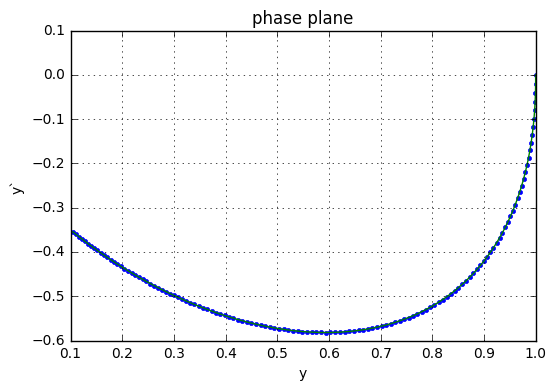

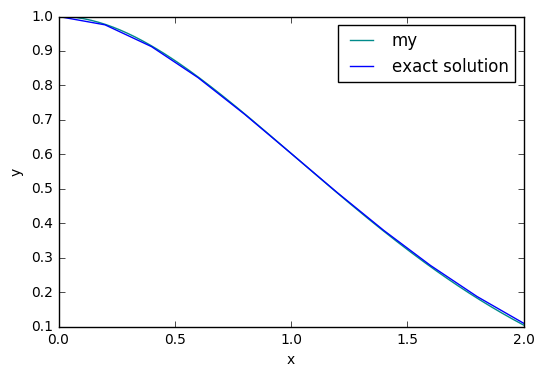

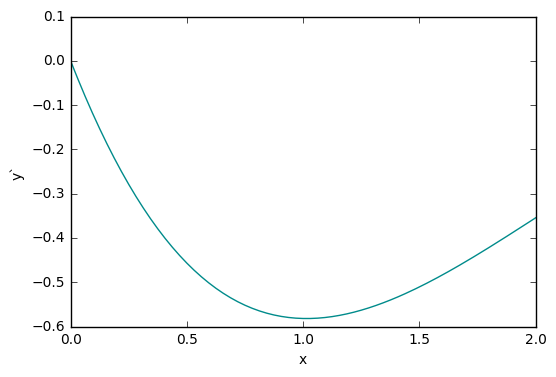

In [6]:
#Чисто неявная схема () yn+1 = yn+h*f(xn,yn)
import numpy as np
import matplotlib.pyplot as plt
eps = .01
def rightpart(x, y1, y2):
    right = np.zeros(2)
    right[0] = y2
    right[1] = -4/3*y2-4/3*y1+x*np.exp(-2*x)/6
    return right
a, b = 0, 2
y1 , y2 = 1, 0
h = 1
q = 1

matrix = np.zeros((5,5))

# Запишем решение (проверять шаг будем по средству совпадения значения функции и ее производной в точке b)
while q >= eps:
    step = int((b - a) / h) + 1
    back = matrix
    matrix = np.zeros((step, 2))    # Матрица 1 - столбец y 2-й столбец y` 
    matrix[0][0] = y1
    matrix[0][1] = y2
    x = a

    for i in range(1, step):
        x = x+h
        matrix[i] = matrix[i - 1] + h * rightpart(x, matrix[i - 1][0], matrix[i - 1][1])
        
    equa = np.zeros((int(step/2), 2))
    for i in range(int(step/2)):
        equa[i][0] = matrix[2*i][0]
        equa[i][1] = matrix[2 * i][1]
    q = abs(np.linalg.norm(equa)- np.linalg.norm(back))/np.linalg.norm(equa)
    h = h/2
print(matrix)
print('x', x)
xnew = np.zeros(step)
ynew = np.zeros(step)
x = np.zeros(step)
x[0] = 0
for i in range(step):
    if i > 0 : 
        x[i] = x[i-1] + 2*h 
    xnew[i] = matrix[i][0]
    ynew[i] = matrix[i][1]
plt.plot(xnew ,ynew, '.')
plt.plot(xnew, ynew)
plt.xlabel('y')
plt.ylabel('y`')
plt.title('phase plane')
plt.grid(True)
plt.show()
def fun(x):
    return 1/64*np.exp(-2*x)*(4*x+33*np.sqrt(2)*np.exp(4*x/3)*np.sin(2*np.sqrt(2)*x/3) + 60*np.exp(4*x/3)*np.cos(2*np.sqrt(2)*x/3)+4)
t = np.arange(0, 2+.2, .2)
yt = np.zeros(len(t))
for i in range(len(t)):
    yt[i] = fun(t[i])
plt.plot(x, xnew, color = '#008B8B', label = 'my')

plt.plot(t, yt, label = 'exact solution')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

plt.show()

plt.plot(x, ynew, color = '#008B8B')
plt.xlabel('x')
plt.ylabel('y`')
plt.show()

0.00390625


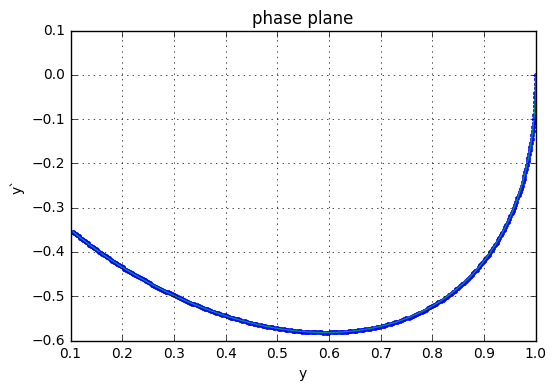

[ 0.         0.0078125  0.015625   0.0234375  0.03125    0.0390625
  0.046875   0.0546875  0.0625     0.0703125  0.078125   0.0859375  0.09375
  0.1015625  0.109375   0.1171875  0.125      0.1328125  0.140625
  0.1484375  0.15625    0.1640625  0.171875   0.1796875  0.1875     0.1953125
  0.203125   0.2109375  0.21875    0.2265625  0.234375   0.2421875  0.25
  0.2578125  0.265625   0.2734375  0.28125    0.2890625  0.296875
  0.3046875  0.3125     0.3203125  0.328125   0.3359375  0.34375    0.3515625
  0.359375   0.3671875  0.375      0.3828125  0.390625   0.3984375  0.40625
  0.4140625  0.421875   0.4296875  0.4375     0.4453125  0.453125
  0.4609375  0.46875    0.4765625  0.484375   0.4921875  0.5        0.5078125
  0.515625   0.5234375  0.53125    0.5390625  0.546875   0.5546875  0.5625
  0.5703125  0.578125   0.5859375  0.59375    0.6015625  0.609375
  0.6171875  0.625      0.6328125  0.640625   0.6484375  0.65625    0.6640625
  0.671875   0.6796875  0.6875     0.6953125  0.703125   

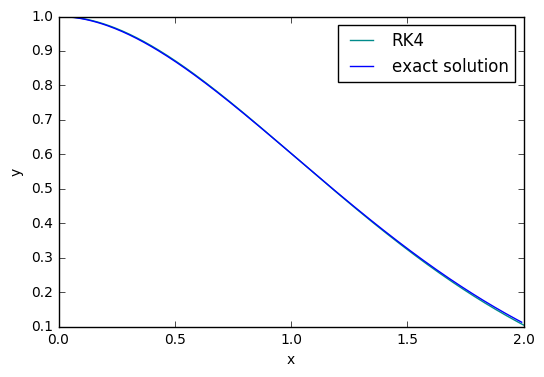

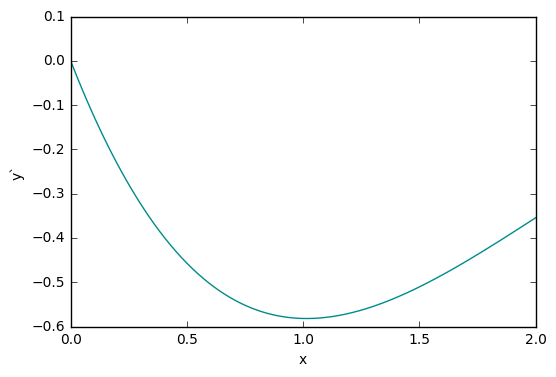

In [7]:
import numpy as np
import matplotlib.pyplot as plt

eps = .01
#Реализуем метод Рунге-Кутта 4-го порядка
#Нам заданно 6y``+ 8y` + 8y = xexp(-2x)
#Приведем к системе заменяя y1 = y, y2 = y1`
def rightpart(x, y1, y2):
    right = np.zeros(2)
    right[0] = y2
    right[1] = -4/3*y2-4/3*y1+x*np.exp(-2*x)/6
    return right

a = 0
b = 2
#Интервал переменно x [0, 2]

x = x0 = a
h = 1     #step
q = 1
matrix = np.zeros((5,5))

r = 1
while q >= eps and r >= eps:
    x = 0
    step = int((b-a)/h) + 1
    back = matrix
    matrix = np.zeros((step+1,2))
    
    y1 = 1
    y2 = 0
    matrix[0][0] = y1
    matrix[0][1] = y2

    

    for i in range(step):

        k11 = h*rightpart(x, y1, y2)[0]
        k12 = h*rightpart(x, y1, y2)[1]
        k21 = h*rightpart((x+h/2), (y1 + k11/2), (y2 + k12/2))[0]
        k22 = h*rightpart((x + h/2), (y1 + k11/2), (y2 + k12/2))[1]
        k31 = h*rightpart((x+h/2), (y1+k21/2), (y2 + k22/2))[0]
        k32 = h*rightpart((x + h/2), (y1 + k21/2), (y2+k22/2))[1]
        k41 = h*rightpart((x + h), (y1 +k31), (y2 + k32))[0]
        k42 = h*rightpart((x + h), (y1 +k31), (y2 + k32))[1]
        y1 = matrix[i][0]
        y2 = matrix[i][1]
        x = x + h
        matrix[i+1][0] = matrix[i][0] + 1/6*(k11+2*k21 + 2*k31+k41)
        matrix[i+1][1] = matrix[i][1] + 1/6*(k12+2*k22+2*k32 + k42)
    
    equa = np.zeros((int(step/2), 2))
    for i in range(int(step/2)):
        equa[i][0] = matrix[2*i][0]
        equa[i][1] = matrix[2 * i][1]
    q = abs(np.linalg.norm(equa)- np.linalg.norm(back))/np.linalg.norm(equa) 
    r = abs((equa[int(len(equa))-1][0] - back[int(len(back)- 1)][0])/equa[int(len(equa)) - 1][0])
    #print('ww', back[len(back)-1][0])
    h = h / 2
print(h)
#print(matrix)

x = np.zeros(step)
y = np.zeros(step)
for i in range(step):
    x[i] = matrix[i][0]
    y[i] = matrix[i][1]
plt.plot(x,y, '.')
plt.plot(x, y, color = '#008B8B')
plt.grid(True)
plt.title('phase plane')
plt.xlabel('y')
plt.ylabel('y`')
plt.show()


def fun(x):
    return 1/64*np.exp(-2*x)*(4*x+33*np.sqrt(2)*np.exp(4*x/3)*np.sin(2*np.sqrt(2)*x/3) + 60*np.exp(4*x/3)*np.cos(2*np.sqrt(2)*x/3)+4)
t = np.arange(0, 2, 2*h)
yt = np.zeros(len(t))
for i in range(len(t)):
    yt[i] = fun(t[i])
xnew = np.arange(0, 2+2*h, 2*h)
print(xnew)
print(len(xnew))
print(len(y))
plt.plot(xnew, x, color = '#008B8B', label = 'RK4')
plt.plot(t, yt, label = 'exact solution')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.plot(xnew, y, color = '#008B8B')
plt.xlabel('x')
plt.ylabel('y`')
plt.show()

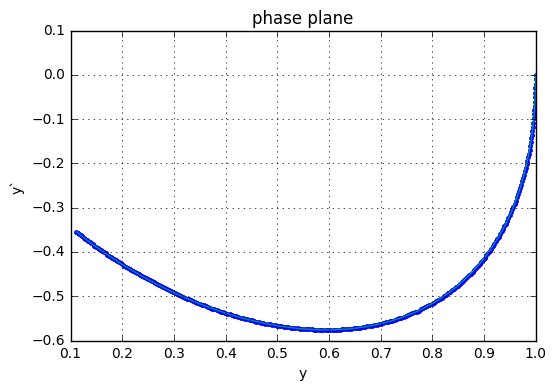

[ 0.         0.0078125  0.015625   0.0234375  0.03125    0.0390625
  0.046875   0.0546875  0.0625     0.0703125  0.078125   0.0859375  0.09375
  0.1015625  0.109375   0.1171875  0.125      0.1328125  0.140625
  0.1484375  0.15625    0.1640625  0.171875   0.1796875  0.1875     0.1953125
  0.203125   0.2109375  0.21875    0.2265625  0.234375   0.2421875  0.25
  0.2578125  0.265625   0.2734375  0.28125    0.2890625  0.296875
  0.3046875  0.3125     0.3203125  0.328125   0.3359375  0.34375    0.3515625
  0.359375   0.3671875  0.375      0.3828125  0.390625   0.3984375  0.40625
  0.4140625  0.421875   0.4296875  0.4375     0.4453125  0.453125
  0.4609375  0.46875    0.4765625  0.484375   0.4921875  0.5        0.5078125
  0.515625   0.5234375  0.53125    0.5390625  0.546875   0.5546875  0.5625
  0.5703125  0.578125   0.5859375  0.59375    0.6015625  0.609375
  0.6171875  0.625      0.6328125  0.640625   0.6484375  0.65625    0.6640625
  0.671875   0.6796875  0.6875     0.6953125  0.703125   

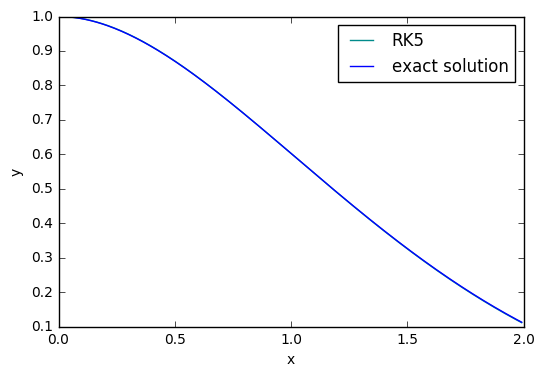

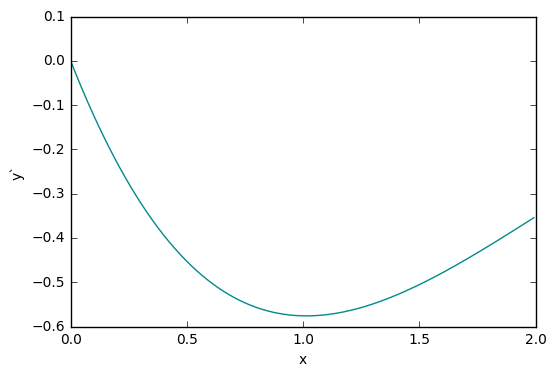

In [8]:
import numpy as np
import matplotlib.pyplot as plt

eps = .001


# Реализуем метод Рунге-Кутта 5-го порядка
# Нам заданно 6y``+ 8y` + 8y = xexp(-2x)
# Приведем к системе заменяя y1 = y, y2 = y1`
def rightpart(x, y1, y2):
    right = np.zeros(2)
    right[0] = y2
    right[1] = -4/3*y2-4/3*y1+x*np.exp(-2*x)/6
    return right

a = 0
b = 2
# Интервал переменно x [0, 2]
x = x0 = a
h = .5  # step
q = 1
matrix = np.zeros(5)
while q >= eps:
    step = int((b-a)/h)    # количество шагов
    y1 = 1
    y2 = 0
    back = matrix
    matrix = np.zeros((step + 1, 2))
    matrix[0][0] = y1
    matrix[0][1] = y2
    k = 1/3*h
    x = 0
    for i in range(0, step):
        y1 = matrix[i][0]
        y2 = matrix[i][1]
        x += h
        k11 = 1/3*rightpart(x, y1, y2)[0]
        k12 = 1/3*rightpart(x, y1, y2)[1]
        k21 = 1/3*rightpart(x + k, y1 + h*k11, y2 + h*k12)[0]
        k22 = 1/3*rightpart(x + k, y1 + h*k11, y2 + h*k12)[1]
        k31 = 1/3*rightpart(x + k, y1 + 1/2*h*k11 + 1/2*h*k21, y2 + 1/2*h*k12 + 1/2*h*k22 )[0]
        k32 = 1/3*rightpart(x + k, y1 + 1/2*h*k11 + 1/2*h*k21, y2 + 1/2*h*k12 + 1/2*h*k22 )[1]
        k41 = 1/3*rightpart(x+1/2*h, y1 +3/8*h*k11 +9/8*h*k31, y2 + 3/8*h*k12 + 9/8*h*k32)[0]
        k42 = 1/3*rightpart(x+1/2*h, y1 +3/8*h*k11 +9/8*h*k31, y2 + 3/8*h*k12 + 9/8*h*k32)[1]
        k51 = 1/3*rightpart(x+h, y1 + 3/2*h*k11 - 9/2*h*k31+ 6*h*k41, y2 + 3/2*h*k21 - 9/2*h*k32 + 6*h*k41)[0]
        k52 = 1/3*rightpart(x+h, y1 + 3/2*h*k11 - 9/2*h*k31+ 6*h*k41, y2 + 3/2*h*k21 - 9/2*h*k32 + 6*h*k41)[1]
        matrix[i+1][0] = matrix[i][0] + h/2*(k11 + 4*k41 + k51)
        matrix[i+1][1] = matrix[i][1] + h/2*(k12 + 4*k42 + k52)




    equa = np.zeros((int(step/2), 2))
    for i in range(int(step/2)):
        equa[i][0] = matrix[2*i][0]
        equa[i][1] = matrix[2 * i][1]
    q = abs(np.linalg.norm(equa)- np.linalg.norm(back))/np.linalg.norm(equa)


    h = h/2

x = np.zeros(step)
y = np.zeros(step)
for i in range(step):
    x[i] = matrix[i][0]
    y[i] = matrix[i][1]
plt.plot(x, y, '.')
plt.plot(x, y, color = '#008B8B')
plt.grid(True)
plt.title('phase plane')
plt.xlabel('y')
plt.ylabel('y`')
plt.show()


def fun(x):
    return 1/64*np.exp(-2*x)*(4*x+33*np.sqrt(2)*np.exp(4*x/3)*np.sin(2*np.sqrt(2)*x/3) + 60*np.exp(4*x/3)*np.cos(2*np.sqrt(2)*x/3)+4)
t = np.arange(a, b, 2*h)
yt = np.zeros(len(t))
for i in range(len(t)):
    yt[i] = fun(t[i])
xnew = np.arange(a, b   , 2*h)
print(xnew)
print(len(xnew))
print(len(y))
plt.plot(xnew, x, color = '#008B8B', label = 'RK5')
plt.plot(t, yt, label = 'exact solution')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.plot(xnew, y, color = '#008B8B')
plt.xlabel('x')
plt.ylabel('y`')
plt.show()

##### Черный ящик.

    На вход подается правая часть системы ОДУ первого порядка, а так же ошибка, интервал, условие начальное, при необходимости построить график (значение переменной graf = 'plot'.

In [9]:
def method(a, b,startpoint, eps, rightpart, graf = 'none'):
    import numpy as np 
    import matplotlib.pyplot as plt
    quantity = len(rightpart(0, startpoint))
    h = 1
    q = 1

    matrix = np.zeros((quantity,quantity))

    p = 0
    while q >= eps:
        p += 1
        step = int((b - a) / h) + 1
        back = matrix
        matrix = np.zeros((step, quantity+1))  
        xmat = np.zeros(step)
        
        for i in range(1, quantity+1):
            matrix[0][i] = startpoint[i-1]
        x = a
        xmat[0] = x
        for i in range(1, step):
            x = x+h
            xmat[i] = x
            matrix[i] = matrix[i - 1] + h * rightpart(x, matrix[i - 1])

        equa = np.zeros((int(step/2), quantity))
        for j in range(quantity):
            for i in range(int(step/2)):
                equa[i][j] = matrix[2*i][j]
        q = abs(np.linalg.norm(equa)- np.linalg.norm(back))/np.linalg.norm(equa)
        h = h/2
    if graf == 'plot':
        x = np.zeros(step)
        y = np.zeros(step)
        x[0] = 0
        for i in range(step):
            if i > 0 : 
                x[i] = x[i-1] + 2*h 

    if graf == 'plot':
        x = np.zeros(step)
        x[0] = 0
        for i in range(step):
            if i > 0 : 
                x[i] = x[i-1] + 2*h 
                y[i] = matrix[i][1]
        plt.plot(x, y)
        plt.show()
        for i in range(step):
            matrix[i][0] = xmat[i]
        print("Количество итераций: ", p)
    return matrix

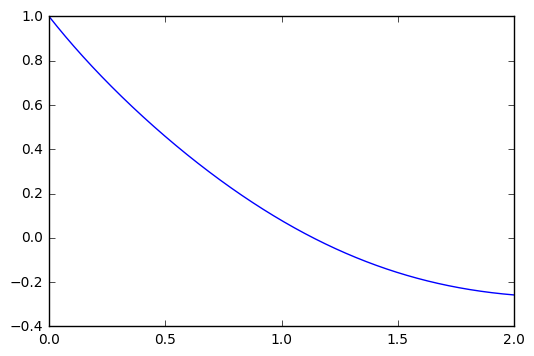

Количество итераций:  11


array([[  0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [  9.76562500e-04,   9.98698868e-01,   0.00000000e+00],
       [  1.95312500e-03,   9.97399108e-01,   0.00000000e+00],
       ..., 
       [  1.99804688e+00,  -2.57582769e-01,   0.00000000e+00],
       [  1.99902344e+00,  -2.57668384e-01,   0.00000000e+00],
       [  2.00000000e+00,  -2.57753612e-01,   0.00000000e+00]])

In [10]:
import numpy as np
def rightpart(x, sp):
        right = np.zeros(len(sp))
        right[0] = sp[1]
        right[1] = -4/3*sp[1]-4/3*sp[0]+x*np.exp(-2*x)
        
        return right
method(0, 2,[1,0] ,0.001, rightpart, 'plot' )

array([[ 0.],
       [ 0.]])